In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [2]:
from sklearn import linear_model
from sklearn.datasets import load_iris


In [7]:
iris = load_iris()
X = iris.data
Y = iris.target


In [10]:
def flower(num):
    if num == 0:
        return 'Setosa'
    elif num == 1:
        return 'Versicolour'
    else:
        return 'Virginica'
iris_data = DataFrame(X,columns=['Sepal Length','Sepal Width','Petal Length','Petal Width'])
iris_target = DataFrame(Y,columns=['Species'])
iris_target['Species'] =  iris_target['Species'].apply(flower)
iris = pd.concat([iris_data,iris_target],axis=1)
iris.head()


,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


c:\python36\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


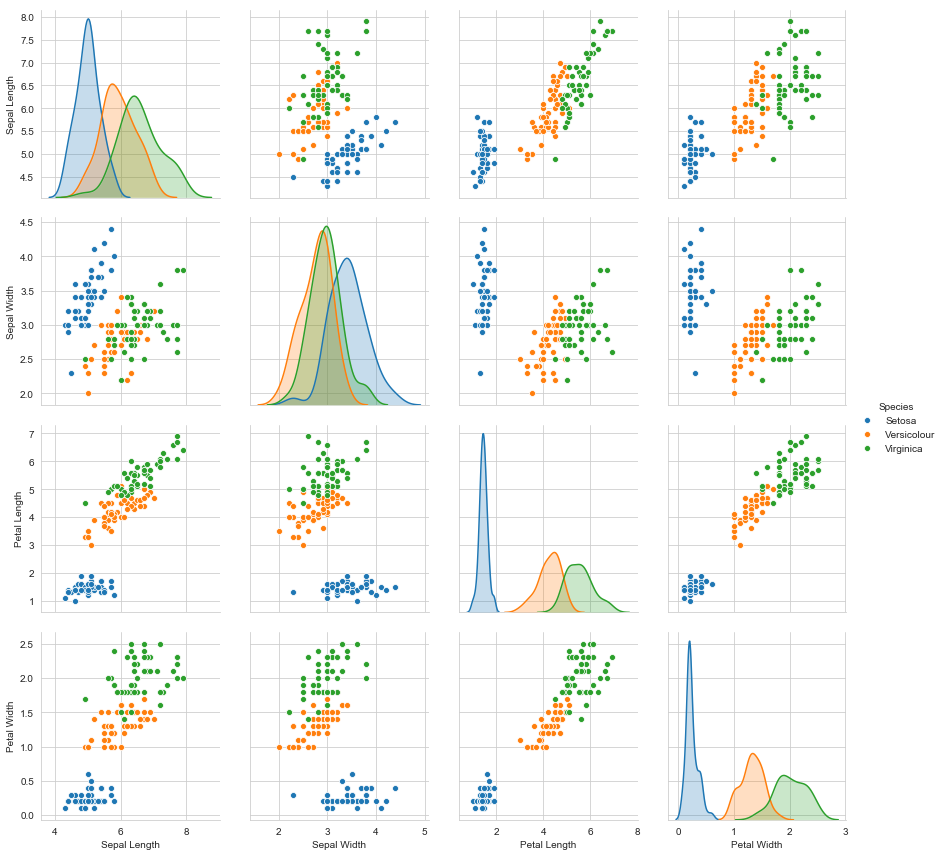

In [13]:
sns.pairplot(iris,hue='Species',size=3)


In [17]:
# sns.factorplot('Petal Length',data=iris,hue='Species',size=10)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [22]:
logreg = LogisticRegression()
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.4,random_state=3)

In [23]:
logreg.fit(X_train,Y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
from sklearn import metrics
Y_pred = logreg.predict(X_test)
metrics.accuracy_score(Y_test,Y_pred)


0.9666666666666667

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)
metrics.accuracy_score(Y_test,Y_pred)

0.95

In [27]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)
metrics.accuracy_score(Y_test,Y_pred)

0.9666666666666667

In [30]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,Y_train)
predicted = model.predict(X_test)
metrics.accuracy_score(Y_test, predicted)


0.9833333333333333

In [32]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(X_train,Y_train)
predicted = model.predict(X_test)
metrics.accuracy_score(Y_test, predicted)


0.9666666666666667

In [34]:
model = SVC(kernel='poly')
model.fit(X_train,Y_train)
predicted = model.predict(X_test)
metrics.accuracy_score(Y_test, predicted)


0.95